In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_excel('Pizza_Sale.xlsx')
df2 = pd.read_excel('Pizza_ingredients.xlsx')

In [3]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape

(48620, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [6]:
df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [4]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [5]:
# Step 1: Create a reference dataframe and drop duplicates
df_reference = df.dropna(subset=['pizza_name_id', 'pizza_name', 'pizza_category', 'pizza_ingredients','total_price']).drop_duplicates()

# Ensure no duplicates in the reference dataframe for mapping
df_reference = df_reference.groupby('pizza_name_id').first().reset_index()
df_reference_name_to_id = df_reference.groupby('pizza_name').first().reset_index()

In [6]:
# Step 2: Fill missing values in the original dataframe
# Fill missing 'pizza_name' using the reference dataframe's pizza_name_id to pizza_name mapping
df['pizza_name'] = df['pizza_name'].fillna(df['pizza_name_id'].map(df_reference.set_index('pizza_name_id')['pizza_name']))

In [7]:
# Fill missing 'pizza_name_id' using the reference dataframe's pizza_name to pizza_name_id mapping
df['pizza_name_id'] = df['pizza_name_id'].fillna(df['pizza_name'].map(df_reference_name_to_id.set_index('pizza_name')['pizza_name_id']))

In [8]:
# Fill missing 'pizza_category' and 'pizza_ingredients' using pizza_name
df['pizza_category'] = df['pizza_category'].fillna(df['pizza_name'].map(df_reference_name_to_id.set_index('pizza_name')['pizza_category']))
df['pizza_ingredients'] = df['pizza_ingredients'].fillna(df['pizza_name'].map(df_reference_name_to_id.set_index('pizza_name')['pizza_ingredients']))

In [9]:
# Fill missing 'total_price' using 'unit_price'
df['total_price'] = df['total_price'].fillna(df['unit_price'])

In [10]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [11]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


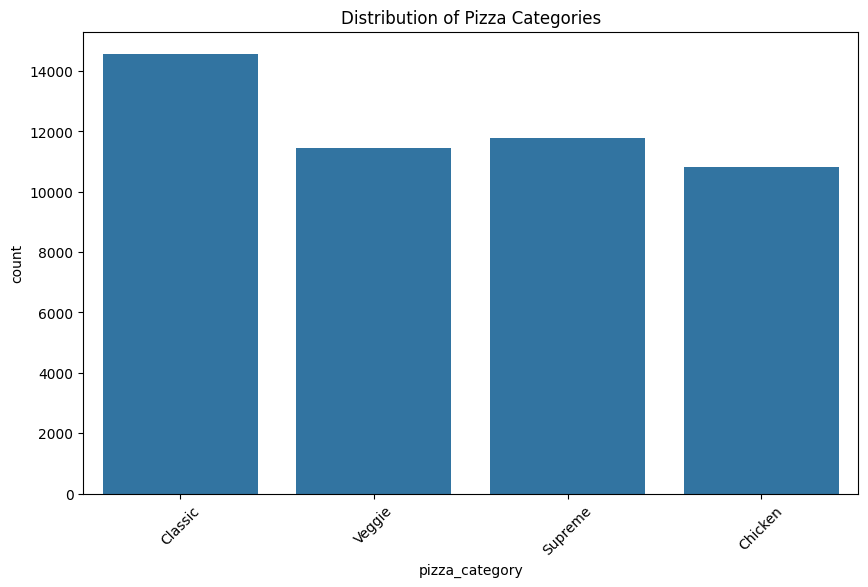

In [15]:
# Distribution of Pizza Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pizza_category')
plt.xticks(rotation=45)
plt.title('Distribution of Pizza Categories')
plt.show()

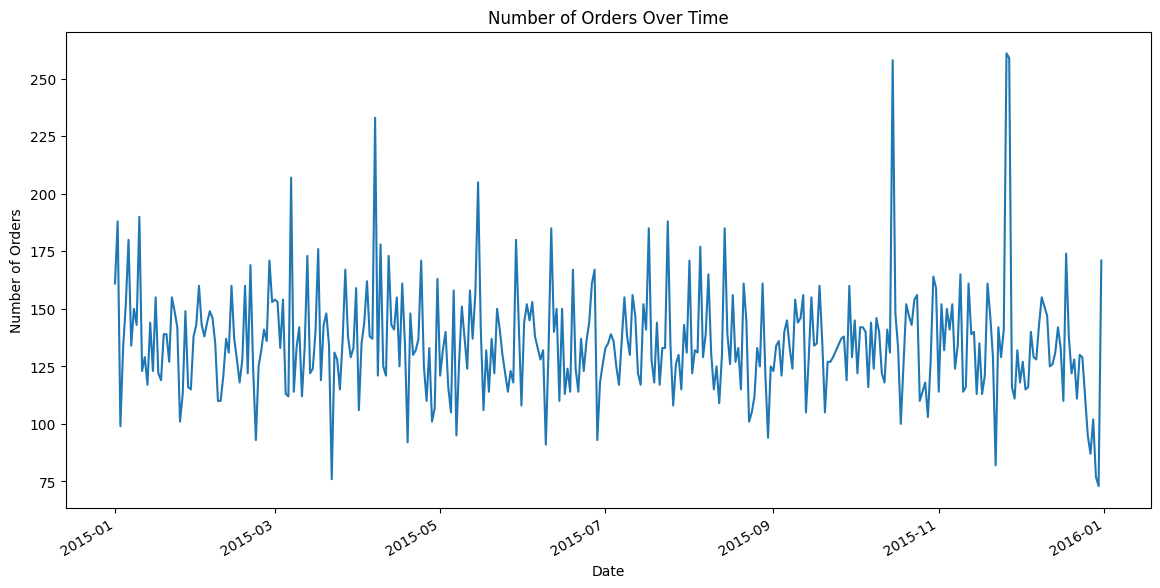

In [16]:
# No Of Orders Over Time
df['order_date'] = pd.to_datetime(df['order_date'])
orders_per_day = df.groupby('order_date').size()

plt.figure(figsize=(14, 7))
orders_per_day.plot()
plt.title('Number of Orders Over Time')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.show()

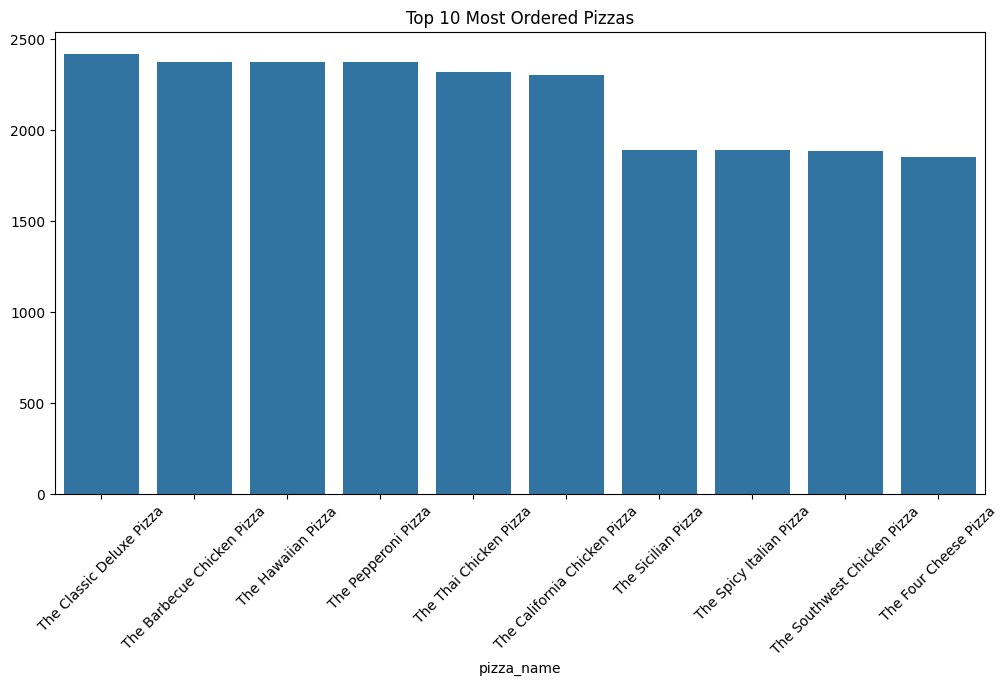

In [17]:
# Top 10 Most Ordered Pizza
top_pizzas = df['pizza_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pizzas.index, y=top_pizzas.values)
plt.xticks(rotation=45)
plt.title('Top 10 Most Ordered Pizzas')
plt.show()

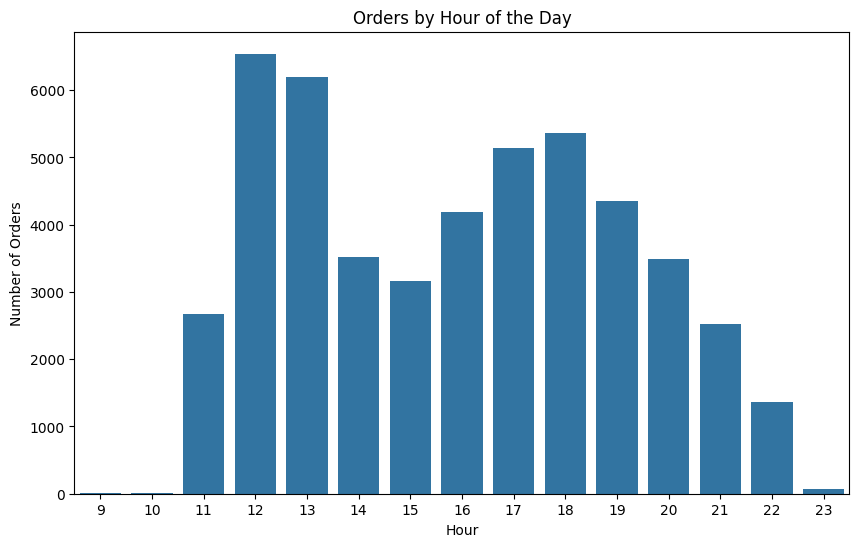

In [18]:
# Orders by Hours of the Day

df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('hour').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

In [12]:
# 1. Extract Day of the Week
df['day_of_week'] = df['order_date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# 2. Extract Month
df['month'] = df['order_date'].dt.month

# 3. Extract Hour of the Day
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['hour'] = df['order_time'].dt.hour

In [13]:
# Create a new column for the year-week combination (ISO format week)
df['week'] = df['order_date'].dt.strftime('%U')

In [14]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,month,hour,week
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,3,1,11,00
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,3,1,11,00
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,3,1,11,00
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,3,1,11,00
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,1,11,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,3,12,21,52
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,3,12,21,52
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,3,12,21,52
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,3,12,22,52


In [15]:
df['total_sales'] = df['quantity'] * df['total_price']  # Assuming you have 'quantity' and 'price' columns


In [ ]:
# Group pizzas by category
pizza_sales_grouped = df.groupby(['pizza_category', 'pizza_name'])

#SARIMA Model

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_percentage_error

# Function to fit ARIMA and forecast sales
def sarima_forecast(pizza_name, category, daily_sales, predictions):
    try:
        # Split the data into train and test sets
        train_size = int(0.8 * len(daily_sales))
        train_data = daily_sales[:train_size]
        test_data = daily_sales[train_size:]
        
        # Fit SARIMA model (adjust (p, d, q) as needed)
        sarima_model = SARIMAX(train_data, order=(5, 1, 0))
        fitted_model = sarima_model.fit()
        
        # Forecast the test period
        forecast = fitted_model.forecast(steps=len(test_data))
        
        # Calculate MAPE
        mape = mean_absolute_percentage_error(test_data, forecast) * 100

        # Forecast the first week of 2016
        forecast_dates = pd.date_range(start='2016-01-01', periods=7)
        forecast_sales = fitted_model.forecast(steps=7)

        # Store predictions in a DataFrame and append to the predictions list
        predictions.append(pd.DataFrame({
            'date': forecast_dates,
            'pizza_name': pizza_name,
            'category': category,
            'predicted_sales': forecast_sales
        }))
        
        return (pizza_name, mape)
    except Exception as e:
        print(f"Model fitting failed for {pizza_name}: {e}")
        return (pizza_name, None)

In [ ]:
# Empty list to store predictions and MAPE scores
predictions = []
mape_scores = []

# Example of how you might call this function
for (category, pizza_name), group_data in pizza_sales_grouped:
    # Sort by order_date for time series modeling
    group_data = group_data.sort_values(by='order_date')
    
    # Aggregate sales by order_date (daily sales)
    daily_sales = group_data.groupby('order_date')['quantity'].sum()
    
    # Call the ARIMA forecasting function for each pizza group
    result = sarima_forecast(pizza_name, category, daily_sales, predictions)
    if result[1] is not None:
        mape_scores.append(result)

# Concatenate all predictions into one DataFrame
predictions_df = pd.concat(predictions)

In [56]:
# Print all MAPE scores
for pizza_name, mape in mape_scores:
    print(f'MAPE for {pizza_name}: {mape:.2f}%')

MAPE for The Barbecue Chicken Pizza: 53.82%
MAPE for The California Chicken Pizza: 43.92%
MAPE for The Chicken Alfredo Pizza: 97.24%
MAPE for The Chicken Pesto Pizza: 58.80%
MAPE for The Southwest Chicken Pizza: 86.59%
MAPE for The Thai Chicken Pizza: 75.88%
MAPE for The Big Meat Pizza: 57.27%
MAPE for The Classic Deluxe Pizza: 59.57%
MAPE for The Greek Pizza: 77.19%
MAPE for The Hawaiian Pizza: 57.80%
MAPE for The Italian Capocollo Pizza: 91.58%
MAPE for The Napolitana Pizza: 101.80%
MAPE for The Pepperoni Pizza: 55.93%
MAPE for The Pepperoni, Mushroom, and Peppers Pizza: 80.65%
MAPE for The Brie Carre Pizza: 60.65%
MAPE for The Calabrese Pizza: 56.54%
MAPE for The Italian Supreme Pizza: 43.82%
MAPE for The Pepper Salami Pizza: 73.72%
MAPE for The Prosciutto and Arugula Pizza: 104.43%
MAPE for The Sicilian Pizza: 71.58%
MAPE for The Soppressata Pizza: 97.94%
MAPE for The Spicy Italian Pizza: 124.48%
MAPE for The Spinach Supreme Pizza: 57.42%
MAPE for The Five Cheese Pizza: 45.42%
MAPE

In [32]:
# Merge predictions with pizza ingredients dataset
predicted_ingredients = pd.merge(predictions_df,df2, on='pizza_name')

# Calculate total ingredient requirement for the first week of 2016
predicted_ingredients['total_ingredient_requirement'] = predicted_ingredients['predicted_sales'] * predicted_ingredients['Items_Qty_In_Grams']

# Aggregate by pizza category, date, and ingredient
final_ingredient_requirements = predicted_ingredients.groupby(['date', 'pizza_name', 'category', 'pizza_ingredients']).agg({
    'total_ingredient_requirement': 'sum'
}).reset_index()

In [33]:
final_ingredient_requirements

,date,pizza_name,category,pizza_ingredients,total_ingredient_requirement
0,2016-01-01,The Barbecue Chicken Pizza,Chicken,Barbecue Sauce,168.258044
1,2016-01-01,The Barbecue Chicken Pizza,Chicken,Barbecued Chicken,504.774132
2,2016-01-01,The Barbecue Chicken Pizza,Chicken,Green Peppers,308.473080
3,2016-01-01,The Barbecue Chicken Pizza,Chicken,Red Onions,673.032176
4,2016-01-01,The Barbecue Chicken Pizza,Chicken,Red Peppers,168.258044
...,...,...,...,...,...
1262,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Red Onions,674.882416
1263,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Red Peppers,168.720604
1264,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Spinach,506.161812
1265,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Tomatoes,337.441208


#Prophet Model

In [62]:
from prophet import Prophet

# Function to fit Prophet and forecast sales
def prophet_forecast(pizza_name, category, daily_sales, predictions):
    try:
        if daily_sales.empty:
            print(f"No sales data available for {pizza_name}. Skipping...")
            return (pizza_name, None)

        # Prepare the data for Prophet
        prophet_data = daily_sales.reset_index().rename(columns={'order_date': 'ds', 'quantity': 'y'})
        
        # Check if there is enough data for training
        if len(prophet_data) < 2:
            print(f"Not enough data for {pizza_name}. Skipping...")
            return (pizza_name, None)

        # Split the data into train and test sets
        train_size = int(0.8 * len(prophet_data))
        train_data = prophet_data[:train_size]
        test_data = prophet_data[train_size:]
        
        if train_data.empty or test_data.empty:
            print(f"Insufficient data for train/test split for {pizza_name}. Skipping...")
            return (pizza_name, None)

        # Fit Prophet model
        model = Prophet()
        model.fit(train_data)
        
        # Make predictions for the test set
        future = model.make_future_dataframe(periods=len(test_data), freq='D')
        forecast = model.predict(future)
        forecast_test = forecast['yhat'][-len(test_data):]

        # Calculate MAPE
        mape = mean_absolute_percentage_error(test_data['y'], forecast_test) * 100

        # Forecast the first week of 2016
        future_week = model.make_future_dataframe(periods=7, freq='D', include_history=False, start_date='2016-01-01')
        forecast_week = model.predict(future_week)

        # Store predictions in a DataFrame and append to the predictions list
        predictions.append(pd.DataFrame({
            'date': forecast_week['ds'],
            'pizza_name': pizza_name,
            'category': category,
            'predicted_sales': forecast_week['yhat']
        }))
        
        return (pizza_name, mape)
    except Exception as e:
        print(f"Model fitting failed for {pizza_name}: {e}")
        return (pizza_name, None)

In [ ]:

# Empty list to store predictions and MAPE scores
predictions = []
mape_scores = []

# Example of how you might call this function
for (category, pizza_name), group_data in pizza_sales_grouped:
    # Sort by order_date for time series modeling
    group_data = group_data.sort_values(by='order_date')
    
    # Aggregate sales by order_date (daily sales)
    daily_sales = group_data.groupby('order_date')['quantity'].sum()
    
    # Call the Prophet forecasting function for each pizza group
    result = prophet_forecast(pizza_name, category, daily_sales, predictions)
    if result[1] is not None:
        mape_scores.append(result)

# Concatenate all predictions into one DataFrame (check if any predictions were made)
if predictions:
    predictions_df = pd.concat(predictions)
else:
    print("No predictions available.")

# Print all MAPE scores
if mape_scores:
    for pizza_name, mape in mape_scores:
        print(f'MAPE for {pizza_name}: {mape:.2f}%')
else:
    print("No MAPE scores available.")

In [37]:
predictions_df

,date,pizza_name,category,predicted_sales
0,2016-01-01,The Barbecue Chicken Pizza,Chicken,7.572938
1,2016-01-02,The Barbecue Chicken Pizza,Chicken,6.603652
2,2016-01-03,The Barbecue Chicken Pizza,Chicken,5.386881
3,2016-01-04,The Barbecue Chicken Pizza,Chicken,6.011375
4,2016-01-05,The Barbecue Chicken Pizza,Chicken,6.160922
...,...,...,...,...
219,2016-01-03,The Vegetables + Vegetables Pizza,Veggie,3.785522
220,2016-01-04,The Vegetables + Vegetables Pizza,Veggie,4.099971
221,2016-01-05,The Vegetables + Vegetables Pizza,Veggie,3.557945
222,2016-01-06,The Vegetables + Vegetables Pizza,Veggie,4.431716


In [38]:
# Merge predictions with pizza ingredients dataset
predicted_ingredients = pd.merge(predictions_df,df2, on='pizza_name')

# Calculate total ingredient requirement for the first week of 2016
predicted_ingredients['total_ingredient_requirement'] = predicted_ingredients['predicted_sales'] * predicted_ingredients['Items_Qty_In_Grams']

# Aggregate by pizza category, date, and ingredient
final_ingredient_requirements = predicted_ingredients.groupby(['date', 'pizza_name', 'category', 'pizza_ingredients']).agg({
    'total_ingredient_requirement': 'sum'
}).reset_index()

In [39]:
final_ingredient_requirements

,date,pizza_name,category,pizza_ingredients,total_ingredient_requirement
0,2016-01-01,The Barbecue Chicken Pizza,Chicken,Barbecue Sauce,227.188151
1,2016-01-01,The Barbecue Chicken Pizza,Chicken,Barbecued Chicken,681.564452
2,2016-01-01,The Barbecue Chicken Pizza,Chicken,Green Peppers,416.511609
3,2016-01-01,The Barbecue Chicken Pizza,Chicken,Red Onions,908.752602
4,2016-01-01,The Barbecue Chicken Pizza,Chicken,Red Peppers,227.188151
...,...,...,...,...,...
1262,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Red Onions,554.247480
1263,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Red Peppers,138.561870
1264,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Spinach,415.685610
1265,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Tomatoes,277.123740


#ARIMA Model

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Function to fit ARIMA and forecast sales
def arima_forecast(pizza_name, category, daily_sales, predictions):
    try:
        # Split the data into train and test sets
        train_size = int(0.8 * len(daily_sales))
        train_data = daily_sales[:train_size]
        test_data = daily_sales[train_size:]
        
        # Fit ARIMA model (adjust (p, d, q) as needed)
        arima_model = ARIMA(train_data, order=(5, 1, 0))
        fitted_model = arima_model.fit()
        
        # Forecast the test period
        forecast = fitted_model.forecast(steps=len(test_data))
        
        # Calculate MAPE
        mape = mean_absolute_percentage_error(test_data, forecast) * 100

        # Forecast the first week of 2016
        forecast_dates = pd.date_range(start='2016-01-01', periods=7)
        forecast_sales = fitted_model.forecast(steps=7)

        # Store predictions in a DataFrame and append to the predictions list
        predictions.append(pd.DataFrame({
            'date': forecast_dates,
            'pizza_name': pizza_name,
            'category': category,
            'predicted_sales': forecast_sales
        }))
        
        return (pizza_name, mape)
    except Exception as e:
        print(f"Model fitting failed for {pizza_name}: {e}")
        return (pizza_name, None)

In [ ]:
# Empty list to store predictions and MAPE scores
predictions = []
mape_scores = []

# Example of how you might call this function
for (category, pizza_name), group_data in pizza_sales_grouped:
    # Sort by order_date for time series modeling
    group_data = group_data.sort_values(by='order_date')
    
    # Aggregate sales by order_date (daily sales)
    daily_sales = group_data.groupby('order_date')['quantity'].sum()
    
    # Call the ARIMA forecasting function for each pizza group
    result = arima_forecast(pizza_name, category, daily_sales, predictions)
    if result[1] is not None:
        mape_scores.append(result)

# Concatenate all predictions into one DataFrame
predictions_df = pd.concat(predictions)

In [50]:
# Print all MAPE scores
for pizza_name, mape in mape_scores:
    print(f'MAPE for {pizza_name}: {mape:.2f}%')

MAPE for The Barbecue Chicken Pizza: 53.82%
MAPE for The California Chicken Pizza: 43.92%
MAPE for The Chicken Alfredo Pizza: 97.24%
MAPE for The Chicken Pesto Pizza: 58.80%
MAPE for The Southwest Chicken Pizza: 86.59%
MAPE for The Thai Chicken Pizza: 75.88%
MAPE for The Big Meat Pizza: 57.27%
MAPE for The Classic Deluxe Pizza: 59.57%
MAPE for The Greek Pizza: 77.19%
MAPE for The Hawaiian Pizza: 57.80%
MAPE for The Italian Capocollo Pizza: 91.58%
MAPE for The Napolitana Pizza: 101.80%
MAPE for The Pepperoni Pizza: 55.93%
MAPE for The Pepperoni, Mushroom, and Peppers Pizza: 80.65%
MAPE for The Brie Carre Pizza: 60.65%
MAPE for The Calabrese Pizza: 56.54%
MAPE for The Italian Supreme Pizza: 43.82%
MAPE for The Pepper Salami Pizza: 73.72%
MAPE for The Prosciutto and Arugula Pizza: 104.43%
MAPE for The Sicilian Pizza: 71.58%
MAPE for The Soppressata Pizza: 97.94%
MAPE for The Spicy Italian Pizza: 124.48%
MAPE for The Spinach Supreme Pizza: 57.42%
MAPE for The Five Cheese Pizza: 45.42%
MAPE

In [51]:
predictions_df

,date,pizza_name,category,predicted_sales
286,2016-01-01,The Barbecue Chicken Pizza,Chicken,6.236272
287,2016-01-02,The Barbecue Chicken Pizza,Chicken,6.400333
288,2016-01-03,The Barbecue Chicken Pizza,Chicken,6.828270
289,2016-01-04,The Barbecue Chicken Pizza,Chicken,7.309253
290,2016-01-05,The Barbecue Chicken Pizza,Chicken,7.215770
...,...,...,...,...
286,2016-01-03,The Vegetables + Vegetables Pizza,Veggie,5.845570
287,2016-01-04,The Vegetables + Vegetables Pizza,Veggie,6.670460
288,2016-01-05,The Vegetables + Vegetables Pizza,Veggie,7.179615
289,2016-01-06,The Vegetables + Vegetables Pizza,Veggie,6.313369


In [52]:
# Merge predictions with pizza ingredients dataset
predicted_ingredients = pd.merge(predictions_df,df2, on='pizza_name')

# Calculate total ingredient requirement for the first week of 2016
predicted_ingredients['total_ingredient_requirement'] = predicted_ingredients['predicted_sales'] * predicted_ingredients['Items_Qty_In_Grams']

# Aggregate by pizza category, date, and ingredient
final_ingredient_requirements = predicted_ingredients.groupby(['date', 'pizza_name', 'category', 'pizza_ingredients']).agg({
    'total_ingredient_requirement': 'sum'
}).reset_index()

In [53]:
final_ingredient_requirements

,date,pizza_name,category,pizza_ingredients,total_ingredient_requirement
0,2016-01-01,The Barbecue Chicken Pizza,Chicken,Barbecue Sauce,187.088167
1,2016-01-01,The Barbecue Chicken Pizza,Chicken,Barbecued Chicken,561.264500
2,2016-01-01,The Barbecue Chicken Pizza,Chicken,Green Peppers,342.994972
3,2016-01-01,The Barbecue Chicken Pizza,Chicken,Red Onions,748.352666
4,2016-01-01,The Barbecue Chicken Pizza,Chicken,Red Peppers,187.088167
...,...,...,...,...,...
1262,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Red Onions,763.113276
1263,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Red Peppers,190.778319
1264,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Spinach,572.334957
1265,2016-01-07,The Vegetables + Vegetables Pizza,Veggie,Tomatoes,381.556638


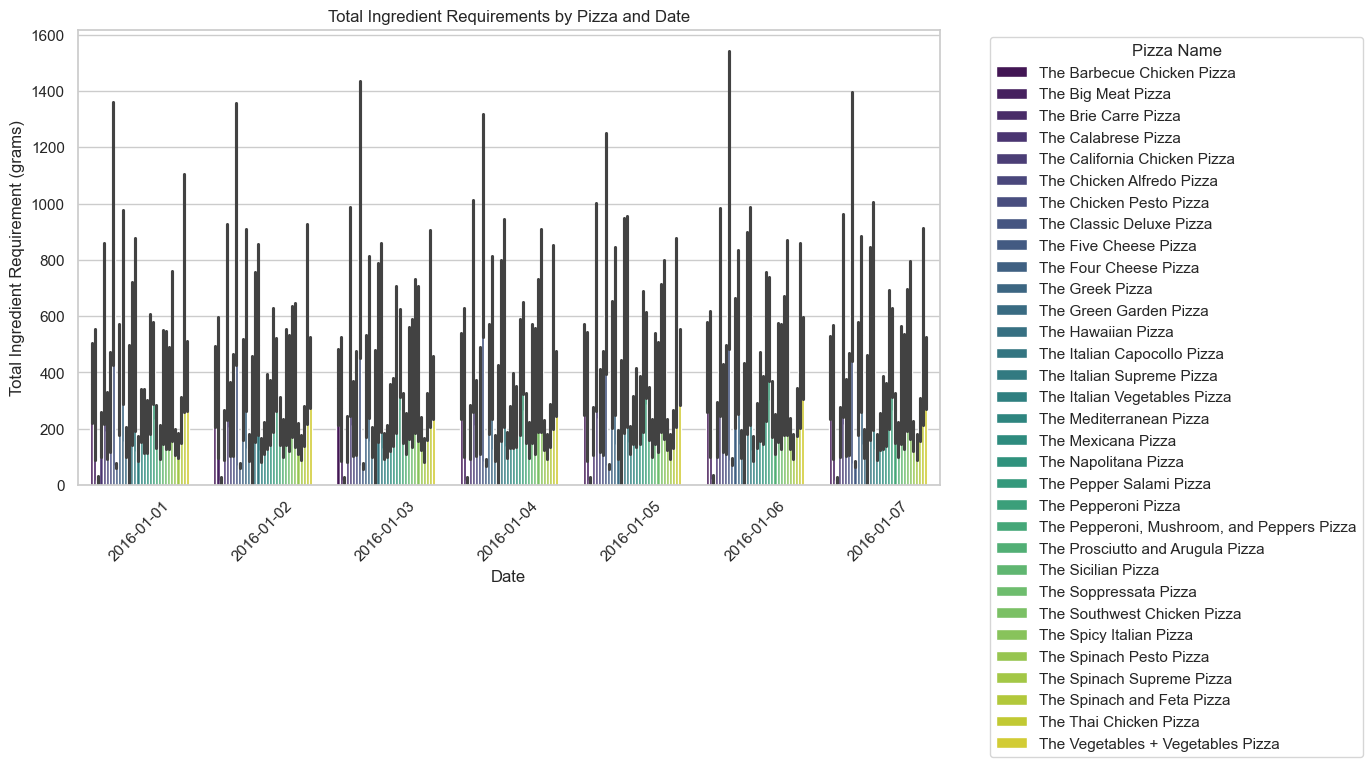

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot of total ingredient requirements by pizza and date
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(data=final_ingredient_requirements, 
                       x='date', 
                       y='total_ingredient_requirement', 
                       hue='pizza_name', 
                       palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Set titles and labels
plt.title('Total Ingredient Requirements by Pizza and Date')
plt.xlabel('Date')
plt.ylabel('Total Ingredient Requirement (grams)')
plt.legend(title='Pizza Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
# Filter data for the first week of 2016
week_start = '2016-01-01'
week_end = '2016-01-07'
week_data = final_ingredient_requirements[(final_ingredient_requirements['date'] >= week_start) & 
                                           (final_ingredient_requirements['date'] <= week_end)]


In [24]:
# Aggregate total ingredient requirements by pizza name
top_pizzas = week_data.groupby('pizza_name')['total_ingredient_requirement'].sum().reset_index()

# Sort and select the top 10 pizzas
top_pizzas = top_pizzas.sort_values(by='total_ingredient_requirement', ascending=False).head(10)


C:\Users\Dell\AppData\Local\Temp\ipykernel_1168\3334484297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_pizzas,


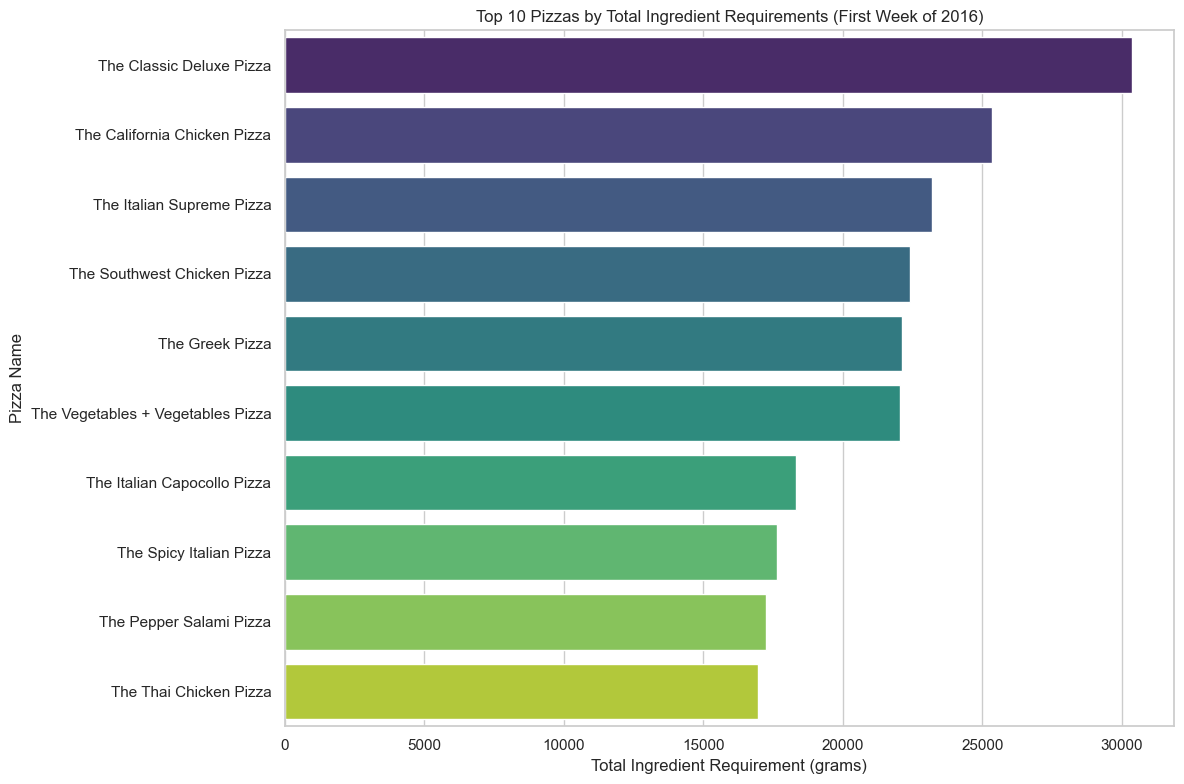

In [25]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for the top 10 pizzas
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=top_pizzas, 
                       x='total_ingredient_requirement', 
                       y='pizza_name', 
                       palette='viridis')

# Set titles and labels
plt.title('Top 10 Pizzas by Total Ingredient Requirements (First Week of 2016)')
plt.xlabel('Total Ingredient Requirement (grams)')
plt.ylabel('Pizza Name')

# Show the plot
plt.tight_layout()
plt.show()
